<a href="https://colab.research.google.com/github/Wanita-8943/efficientnet_keras_transfer_learning/blob/master/Predict_1_2e-4_32_0.2_Male18_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
import pandas as pd
import numpy as np

In [84]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [86]:
import sys
sys.path.append('/content/drive/MyDrive/cut_panoramic/Model/2e-4_32_0.2_Male18_500.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [87]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/cut_panoramic/Model/2e-4_32_0.2_Male18_500.h5')
height = width = model.input_shape[1]

In [88]:
df = pd.read_csv (f'/content/drive/MyDrive/cut_panoramic/Data/New_Data_Male125.csv')
df

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,1,7,Y07M,0,VV03.jpg,/content/drive/My Drive/TVT_Male125/train/Y07M...,เพศชาย,Both
1,2,1,7,Y07M,0,Flip_VV03.jpg,/content/drive/My Drive/TVT_Male125/train/Y07M...,เพศชาย,Both
2,3,2,7,Y07M,0,VV04.jpg,/content/drive/My Drive/TVT_Male125/train/Y07M...,เพศชาย,Both
3,4,2,7,Y07M,0,Flip_VV04.jpg,/content/drive/My Drive/TVT_Male125/train/Y07M...,เพศชาย,Both
4,5,3,7,Y07M,0,VV05.jpg,/content/drive/My Drive/TVT_Male125/train/Y07M...,เพศชาย,Both
...,...,...,...,...,...,...,...,...,...
2370,121,77,25,Y25M,18,Flip_J463.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2371,122,78,25,Y25M,18,J464.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2372,123,78,25,Y25M,18,Flip_J464.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2373,124,79,25,Y25M,18,J465.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both


In [89]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [90]:
DATA_PATH = "/content/drive/My Drive/TVT_Male125"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/TVT_Male125/train
/content/drive/My Drive/TVT_Male125/test


In [91]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [92]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Re',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 1425 validated image filenames.


In [93]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person_Sex,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,51,7,Y07M,0,VV83.jpg,/content/drive/My Drive/TVT_Male125/test/Y07M/...,เพศชาย,Both
101,102,51,7,Y07M,0,Flip_VV83.jpg,/content/drive/My Drive/TVT_Male125/test/Y07M/...,เพศชาย,Both
102,103,52,7,Y07M,0,VV84.jpg,/content/drive/My Drive/TVT_Male125/test/Y07M/...,เพศชาย,Both
103,104,52,7,Y07M,0,Flip_VV84.jpg,/content/drive/My Drive/TVT_Male125/test/Y07M/...,เพศชาย,Both
104,105,53,7,Y07M,0,VV85.jpg,/content/drive/My Drive/TVT_Male125/test/Y07M/...,เพศชาย,Both
...,...,...,...,...,...,...,...,...,...
2370,121,77,25,Y25M,18,Flip_J463.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2371,122,78,25,Y25M,18,J464.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2372,123,78,25,Y25M,18,Flip_J464.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both
2373,124,79,25,Y25M,18,J465.jpg,/content/drive/My Drive/TVT_Male125/test/Y25M/...,เพศชาย,Both


In [94]:
act = test['Class_Re'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [95]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [96]:
predict_image(path[0])[0]

1/1 [==============================] - 3s 3s/step


3.5532372

In [97]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 60ms/step


In [98]:
pred_list

[3.5532372,
 3.5532455,
 3.5532475,
 3.5532377,
 3.5532417,
 3.5532818,
 3.553895,
 3.5535083,
 3.5532372,
 3.553237,
 3.5532372,
 3.553238,
 3.553246,
 3.5532374,
 3.5532758,
 3.5532882,
 3.5532382,
 3.5532384,
 3.553247,
 3.5532467,
 3.5532568,
 3.5553741,
 3.554779,
 3.5906932,
 3.5544167,
 3.553242,
 3.553237,
 3.553238,
 3.553237,
 3.553238,
 3.553237,
 3.553242,
 3.5532389,
 3.553238,
 3.5532403,
 3.553237,
 3.553237,
 3.5532782,
 3.5532928,
 3.553237,
 3.553237,
 3.5532372,
 3.553237,
 3.553245,
 3.553253,
 3.553237,
 3.553237,
 3.553237,
 3.553237,
 3.5532377,
 3.8312383,
 3.5532656,
 3.5533984,
 3.5533423,
 3.5532372,
 3.5532386,
 3.553237,
 3.553244,
 3.5532384,
 3.553237,
 3.553237,
 3.5532377,
 3.553237,
 3.6419504,
 3.55934,
 3.5551887,
 3.555906,
 3.5532386,
 3.5532374,
 3.5532591,
 3.553254,
 3.553237,
 3.553237,
 3.553237,
 3.553237,
 3.5534482,
 3.5535097,
 3.553393,
 3.5532413,
 3.5532374,
 3.553237,
 3.553583,
 3.5532432,
 3.5838432,
 3.5663414,
 3.553237,
 3.553237,

In [99]:
print(type(pred_list))

<class 'list'>


In [100]:
pred_int = np.around(pred_list)

In [101]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [102]:
pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 8.,
       4., 4., 4., 4., 4., 4., 4., 7., 4., 4., 4., 4., 4., 4., 4., 4., 8.,
       4., 6., 6., 4., 4., 4., 8., 8., 4., 4., 8., 6., 5., 8., 4., 4., 5.,
       7., 4., 5., 6., 4., 4., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 6., 8., 4., 4., 8., 8., 8., 8., 8., 8.,
       4., 6., 4., 4., 4., 4., 5., 4., 8., 8., 8., 6., 8., 4., 7., 8., 8.,
       7., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 7., 5., 8., 8., 4., 4.,
       4., 4., 4., 8., 8.

In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 8.0%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        25
           4       0.14      0.80      0.24        25
           5       0.43      0.12      0.19        25
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        25
           8       0.05      0.60      0.09        25
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        25
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00        25
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        25
          16       0.00      0.00      0.00        25


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

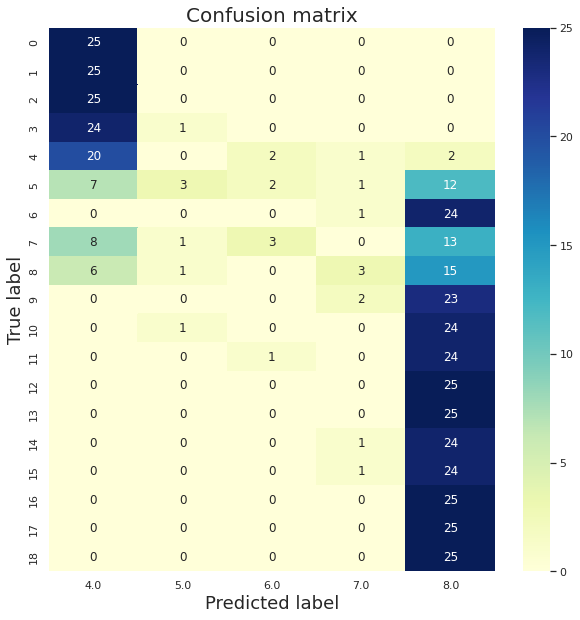

In [104]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)